# 用Ｋ-means进行颜色量化
对给定的图像进行像素矢量量化(VQ)，将显示图像所需的颜色从224种减少到64种，同时保持整体外观质量。

在本例中，像素在3D空间中表示，使用K-means找到64个颜色簇。在图像处理文献中，由K-means(聚类中心)得到的码本称为调色板。使用单个字节，最多可以寻址256种颜色，而RGB编码需要每个像素3个字节。例如，GIF文件格式就使用了这样一个调色板。

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time


## Sample data

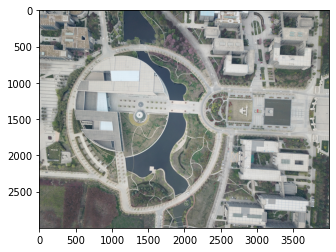

In [6]:
img = plt.imread("data/npu.jpg")
img = np.array(img, dtype=np.float64) / 255 # 除以255是重要的这样plt.imshow在浮点数(需要在[0-1]的范围)上的表现会很好
plt.imshow(img)

In [7]:
# 加载图像并转化成2D的numpy数组。
w, h, d = original_shape = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))
image_array

array([[0.72156863, 0.72941176, 0.71764706],
       [0.72941176, 0.7372549 , 0.7254902 ],
       [0.71764706, 0.7254902 , 0.71372549],
       ...,
       [0.26666667, 0.3372549 , 0.3372549 ],
       [0.30980392, 0.38823529, 0.38431373],
       [0.28627451, 0.36470588, 0.36078431]])

In [8]:
# 随机采样1000个像素点进行kmeans聚类
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
# 获得所有点的标签
labels = kmeans.predict(image_array)

In [10]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

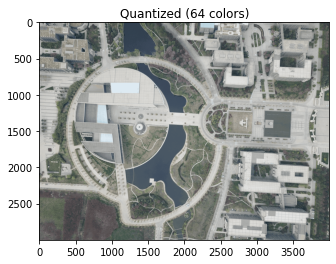

In [12]:
# 64 VQ 图像
plt.figure()
plt.title('Quantized (64 colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))